# Setup

Run the following code before working on any problem to import util functions used to test your code

In [0]:
!pip install -q seaborn==0.9.0

In [0]:
import requests

import pandas as pd

import seaborn as sns

from google.colab import files

def check_approx_equals(expected, received):
    """
    Checks received against expected, and returns whether or 
    not they match (True if they do, False otherwise). 
    If the argument is a float, will do an approximate check.
    If the arugment is a data structure will do an approximate check
    on all of its contents.
    """
    try:
        if type(expected) == dict:
            # first check that keys match, then check that the
            # values approximately match
            return expected.keys() == received.keys() and \
                all([check_approx_equals(expected[k], received[k])
                    for k in expected.keys()])
        elif type(expected) == list or type(expected) == set:
            # Checks both lists/sets contain the same values
            return len(expected) == len(received) and \
                all([check_approx_equals(v1, v2)
                    for v1, v2 in zip(expected, received)])
        elif type(expected) == float:
            return math.isclose(expected, received, abs_tol=0.001)
        else:
            return expected == received
    except Exception as e:
        print(f'EXCEPTION: Raised when checking check_approx_equals {e}')
        return False


def assert_equals(expected, received):
    """
    Checks received against expected, throws an AssertionError
    if they don't match. If the argument is a float, will do an approximate
    check. If the arugment is a data structure will do an approximate check
    on all of its contents.
    """
    assert check_approx_equals(expected, received), \
        f'Failed: Expected {expected}, but received {received}'

In [0]:
import requests

def save_file(url, file_name):
  r = requests.get(url)
  with open(file_name, 'wb') as f:
    f.write(r.content)

save_file('https://courses.cs.washington.edu/courses/cse163/19sp/files/section/'
          + '04-18/cancer.csv', 'cancer.csv')

# Problem 1: Pandas Continued

Run the following code to import data about cancer rates into a pandas dataframe called df. Node the names of the columns, as these will be useful for the functions you'll be required to write

In [0]:
df = pd.read_csv('cancer.csv')

df.head()

## Problem 1.1: `washington_rate`

Write a function named `washington_rate` that accepts a Pandas dataframe and returns the complete row of data for all information about cancer deaths (Event Type = Mortality) that occurred in Washington (Area = Washington)

In [0]:
# Type your solution here
def washington_rate(df):
  in_washington = df['Area'] == 'Washington'
  death = df['Event Type'] == 'Mortality'
  return df[in_washington & death]

In [0]:
# Test
wr = washington_rate(df)
print(wr.head())

assert_equals(168, len(wr))
assert_equals(803464, wr['Count'].sum())

## Problem 1.2: `either_area_rate`

Write a function `either_area_rate` that that accepts a Pandas dataframe, an area a1, and an area a2 and returns the complete row of data for all information about cancer deaths (Event Type = Mortality) that occurred in an Area equal to a1 or a2.

If a2 is not specified, it should default to Washington. So, the call to `either_area_rate(Nevada)` would return rows with an area of Washington or Nevada.
Note that the function should still be able to take two parameters: `either_area_rate(Ohio, Michigan)` should return rows in Ohio or Michigan.

Note: This function will be similar to 1.1!


In [0]:
# Type your solution here
def either_area_rate(df, a1, a2='Washington'):
  in_a1 = df['Area'] == a1
  in_a2 = df['Area'] == a2
  death = df['Event Type'] == 'Mortality'
  return df[(in_a1 | in_a2) & death]

In [0]:
# Test 1
nev_col = either_area_rate(df, 'Nevada', 'Colorado')
print(nev_col.head())

assert_equals(336, len(nev_col))
assert_equals(794626, nev_col['Count'].sum())

In [0]:
# Test 2
ohio_wash = either_area_rate(df, 'Ohio')
print(ohio_wash.head())

assert_equals(336, len(ohio_wash))
assert_equals(2607690, ohio_wash['Count'].sum())

## Problem 1.3: `occurrences_in_pop`

Write a function named `occurrences_in_pop` that accepts a Pandas dataframe, an integer representing a population minimum `m`, and a given sex ('Male', 'Female', or 'Male and Female') and returns the complete row of data for all cancer incidence (Event Type = Incidence) of the given sex for all data points with population greater than or equal to `m`. Returns None if no records exist that satisfy the given conditions.

In [0]:
# Type your solution here
def occurrences_in_pop(df, sex, m):
  is_incidence = df['Event Type'] == 'Incidence'
  is_sex = df['Sex'] == sex
  above_m = df['Population'] >= m
  if len(df) == 0:
    return None
  else:
    return df[is_incidence & is_sex & above_m]

In [0]:
# Test 1
male_10mil = occurrences_in_pop(df, 'Male', 10000000)
print(male_10mil.head())

assert_equals(425, len(male_10mil))
assert_equals(76938250, male_10mil['Count'].sum())

In [0]:
# Test 2
female_500k = occurrences_in_pop(df, 'Female', 500000)
print(len(female_500k), female_500k['Count'].sum())
print(female_500k.head())

assert_equals(2422, len(female_500k))
assert_equals(95317826, female_500k['Count'].sum())

## Problem 1.4: `deaths_per_year`

Write a function named `deaths_per_year` that accepts a Pandas dataframe and returns a series with the number of cancer deaths (Event Type = Mortality) for each year between 2002 - 2008 for both sexes and all races. The series returned should be sorted by year ascending.

**Hint:** If you aren't getting the correct numbers, you might want to invesigate the dataset a little more closesly. Here's a block of code you can try printing out if you're stuck!

```
df.loc[[5, 32, 59]]
```

In [0]:
# Type your solution here
def deaths_per_year(df):
  both_sexes = df['Sex'] == 'Male and Female'
  all_races = df['Race'] == 'All Races'
  between_years = (df['Year'] >= 2002) & (df['Year'] <= 2008)
  is_mortality = df['Event Type'] == 'Mortality'
  filtered_df = df[between_years & both_sexes & all_races & is_mortality]
  return filtered_df.groupby('Year')['Count'].sum()

In [0]:
# Test
dpy = deaths_per_year(df)
print(dpy)

assert_equals(7, len(dpy))
assert_equals(11746632, dpy.sum())

# Problem 2: Plotting Code

We will be using Seaborn in this section to make visualizations. As mentioned in lecture, Seaborn has great documentation, so you should take this time to read about some of the functions you might need in this class below. Feel free to look at some of the examples included in the links below to determine whether or not you might need to use the function.


Here's some seaborn functions you might need for this section:

* [Bar/Violin Plot](https://seaborn.pydata.org/generated/seaborn.catplot.html)
* [Plot a Distribution](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)
* [Scatter/Line Plot](https://seaborn.pydata.org/generated/seaborn.relplot.html)
* [Linear Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html)
* [Compare Two Variables](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
* [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)


Note: The Seaborn library has been included at the top and is in a variable named `sns`

## Problem 2.1: Line Chart

Create a function called `plot_line` that accepts a Pandas dataframe and creates and displays a line chart using Seaborn that plots similar information to what you generated in 1.4.  

You should generate a line plot, where the years are on the x axis and the count is on the y axis, of the number of cancer deaths (Event Type = Mortality) for each year between 2002 - 2008 for both sexes and all races *in the state of Washington*.

**NOTE:** the information you're plotting in this problem is very similar to problem 1.4, except this time you are constrained to a single area (*only* Washington). This means that you should be able to look up the exact row that corresponds to mortality counts for all races and both sexes in the state of Washington directly **without needing a groupby** (there's nothing to aggregate in this case, since you can look it up directly in the dataframe). Most of the logic for filtering the correct data will be the same as in problem 1.4, so feel free to copy over relevant parts of your solution here.

In [0]:
# Type your solution here
def plot_line(df):
  both_sexes = df['Sex'] == 'Male and Female'
  all_races = df['Race'] == 'All Races'
  between_years = (df['Year'] >= 2002) & (df['Year'] <= 2008)
  is_mortality = df['Event Type'] == 'Mortality'
  in_washington = df['Area'] == 'Washington'
  filtered_df = df[between_years & both_sexes & all_races 
                   & is_mortality & in_washington]
  sns.relplot(x='Year', y='Count', data=filtered_df, kind='line')

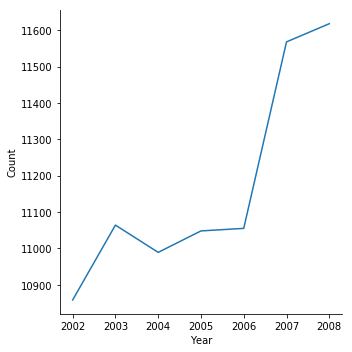

In [0]:
plot_line(df)

## Problem 2.2: Regression Plot

Create a function called `plot_regression` that accepts a Pandas dataframe and crates a linear regression plot between Population and Count for cancer incidence (Event Type = Incidence).

In [0]:
# Type your solution here
def plot_regression(df):
  info = df[df['Event Type'] == 'Incidence']
  sns.regplot(x='Population', y='Count', data=info)

In [0]:
plot_regression(df)

# Problem 3: Discussion



## Problem 3.1
Do you think a line chart is an effective visualization in problem 2.1? Explain in 1-2 sentences why or why not.






Answer:

**Many answers can are accepted here. A few examples are listed below:**

One reason this visualization might not be ideal is that it's only showing the count of cancer rates, but it doesn't take into account the population growth/decrease. It would be hard to make any meaningful conclusions with just the raw count if we didn't take into account any popultion change (for example, maybe the population was growing at the same rate so the cancer )

Another good reason might be that the line chart's y axis is pretty constrained, so this visualization might be over-emphasizing the relative change in cancer rates.

## Problem 3.2
What do you think are the limitations of this dataset?

Answer:

**Many answers can are accepted here. One example is below:**

This dataset only reveals the count of people who have cancer in some area/time. It might be good to have more individual data to work with here (age, job, types of habits (ie. smoking, drinking)), since it might be hard to draw any meaningful conclusions from this data about what is correlated with cancer and the cause of cancer is likely to be more than a factor of area/time

